In [1]:
%pylab inline 
%load_ext autoreload
%autoreload 2

import numpy as np 
import random
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


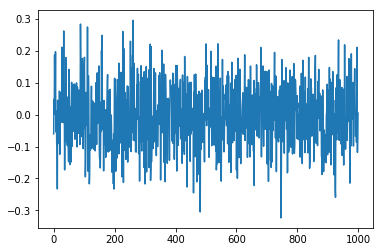

(array([  2.,  20.,  62., 157., 209., 231., 195.,  88.,  29.,   7.]),
 array([-0.32415416, -0.26209366, -0.20003316, -0.13797266, -0.07591216,
        -0.01385166,  0.04820884,  0.11026934,  0.17232984,  0.23439034,
         0.29645084]),
 <a list of 10 Patch objects>)

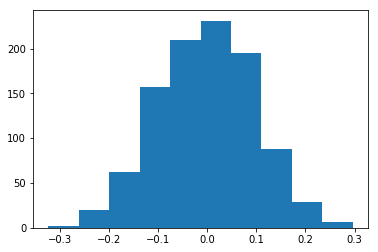

In [2]:
# random distribution in numpy and plotting using matplotlib
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000)
plot(s); show()
plt.hist(s)

In [3]:
class Bandit:
    def __init__(self, k, steps, e): # k: number of arms
        self.k = k
        self.steps = steps
        self.e = e
        self.average_reward = 0
        self.cum_avg_reward = np.zeros(steps)    
        
    def generate_problem(self):
        self.q_values = np.random.normal(0, 1, size=self.k) # Generate the action values q*(a) for a given problem, with mean as 0, and variance as 1
        
    def generate_reward(self, action):
        return np.random.normal(self.q_values[action], 1) # For a given action A_t the actual reward R_t is a normal distribution with mean q*(A_t) and variance 1
    
    def e_greedy_solution(self, problem_count):
        self.Q = {i: 0 for i in range(self.k)} # Store the Q values for the action 
        self.N = {i: 0 for i in range(self.k)} # Store the number of times that action happened
        
        for i in range(self.steps):
            explore = np.random.random() < self.e
            if (explore):
                action = np.random.randint(0, self.k) # Choose a random action 
            else:
                action = max(self.Q, key=self.Q.get) # Chose the action with maximum reward

            reward = self.generate_reward(action) # Get the reward for the current action
            self.average_reward += (reward - self.average_reward)/(i+1)
            self.cum_avg_reward[i] += (self.average_reward - self.cum_avg_reward[i])/(problem_count+1)
            self.N[action] += 1 # update the count number for that action 
            self.Q[action] += (1 / self.N[action]) * (reward - self.Q[action]) # Update the Q for that particular action        

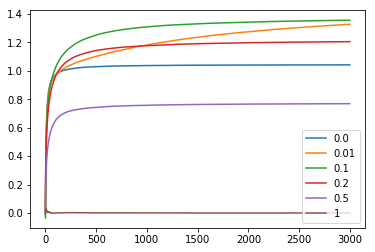

In [5]:
e_values = [0.0, 0.01, 0.1, 0.2, 0.5, 1]

for e in e_values:
    b = Bandit(10, 3000, e)
    for j in range(3000):
        b.generate_problem()
        b.e_greedy_solution(j)
    plot(b.cum_avg_reward, label=e)
    legend(loc='best')